In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import math
from keras.preprocessing.image import ImageDataGenerator
dim=(100,100)

In [2]:
a=cv2.imread("CT/"+str(1)+".jpeg")
b=cv2.imread("MRI/"+str(1)+".jpeg")
c=plt.imread("RESULT/"+str(1)+".tif")

ct_images = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY).reshape(-1,1)
mr_images = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY).reshape(-1,1)
result_images = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY).reshape(-1,1)
ct_images.shape


(147456, 1)

In [3]:

for i in range(2,6):
    a=cv2.imread("CT/"+str(i)+".jpeg")
    b=cv2.imread("MRI/"+str(i)+".jpeg")
    c=plt.imread("RESULT/"+str(i)+".tif")
    
    
    a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY).reshape(-1,1)
    b = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY).reshape(-1,1)
    c = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY).reshape(-1,1)
    
    if(len(a)!=len(b)):
        print(i)
    
    ct_images=np.concatenate((ct_images, a), axis=0)
    mr_images=np.concatenate((mr_images, b), axis=0)
    result_images=np.concatenate((result_images, c), axis=0)   

print(ct_images.shape)
print(mr_images.shape)
print(result_images.shape)

(737280, 1)
(737280, 1)
(737280, 1)


In [4]:
X=np.concatenate((ct_images, mr_images), axis=1)
y=result_images

In [5]:
X.shape

(737280, 2)

In [6]:
y.shape

(737280, 1)

In [7]:
test_x=cv2.imread("CT/2.jpeg") 
test_x = cv2.cvtColor(test_x, cv2.COLOR_BGR2GRAY).reshape(-1,1)


test_x2=cv2.imread("MRI/2.jpeg")   
test_x2 = cv2.cvtColor(test_x2, cv2.COLOR_BGR2GRAY).reshape(-1,1)


test=np.concatenate((test_x, test_x2), axis=1)


test_result=plt.imread("RESULT/2.tif")   
test_result = cv2.cvtColor(test_result, cv2.COLOR_BGR2GRAY).reshape(-1,1)

In [8]:
test.shape

(147456, 2)

In [9]:
test_result.shape

(147456, 1)

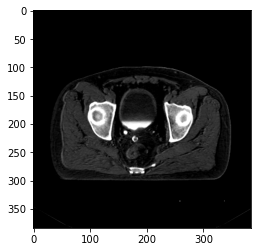

In [10]:
plt.figure()
plt.imshow(test_result.reshape(384,384),cmap="gray")
plt.show()

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
from sklearn import preprocessing




classifier=Sequential()
classifier.add(Dense(6, activation="relu",input_dim=2))
classifier.add(Dense(4, activation="relu"))
classifier.add(Dense(3, activation="relu"))
classifier.add(Dense(4, activation="relu"))
classifier.add(Dense(1, activation="sigmoid"))

classifier.compile(optimizer="adam",loss="mean_absolute_error",metrics=["accuracy"])

classifier.fit(X,y,epochs=15,batch_size=120)

y_pred=classifier.predict(test)

Epoch 1/150
6144/6144 [==============================] - 5s 842us/step - loss: 18.6789 - accuracy: 0.5976
Epoch 2/150
6144/6144 [==============================] - 5s 838us/step - loss: 18.6552 - accuracy: 0.6057
Epoch 3/150
6144/6144 [==============================] - 5s 824us/step - loss: 18.6546 - accuracy: 0.6062
Epoch 4/150
6144/6144 [==============================] - 5s 848us/step - loss: 18.6544 - accuracy: 0.6065
Epoch 5/150
6144/6144 [==============================] - 5s 839us/step - loss: 18.6542 - accuracy: 0.6066
Epoch 6/150
6144/6144 [==============================] - 5s 863us/step - loss: 18.6542 - accuracy: 0.6067
Epoch 7/150
6144/6144 [==============================] - 5s 840us/step - loss: 18.6542 - accuracy: 0.6067
Epoch 8/150
6144/6144 [==============================] - 5s 858us/step - loss: 18.6540 - accuracy: 0.6070
Epoch 9/150
6144/6144 [==============================] - 6s 911us/step - loss: 18.6540 - accuracy: 0.6069
Epoch 10/150
6144/6144 [======================

6144/6144 [==============================] - 5s 882us/step - loss: 18.6537 - accuracy: 0.6072
Epoch 78/150
6144/6144 [==============================] - 5s 786us/step - loss: 18.6535 - accuracy: 0.6075
Epoch 79/150
6144/6144 [==============================] - 5s 814us/step - loss: 18.6536 - accuracy: 0.6073
Epoch 80/150
6144/6144 [==============================] - 5s 879us/step - loss: 18.6535 - accuracy: 0.6075
Epoch 81/150
6144/6144 [==============================] - 5s 836us/step - loss: 18.6535 - accuracy: 0.6075
Epoch 82/150
6144/6144 [==============================] - 5s 877us/step - loss: 18.6536 - accuracy: 0.6074
Epoch 83/150
6144/6144 [==============================] - 6s 940us/step - loss: 18.6536 - accuracy: 0.6074
Epoch 84/150
6144/6144 [==============================] - 5s 828us/step - loss: 18.6535 - accuracy: 0.6073 1s - 
Epoch 85/150
6144/6144 [==============================] - 5s 820us/step - loss: 18.6535 - accuracy: 0.6075
Epoch 86/150
6144/6144 [====================

In [ ]:
size=int(math.sqrt(len(y_pred)))
plt.figure()
plt.imshow(y_pred.reshape(size,size),cmap="gray")
plt.show()